# Regression Week 3: Assessing Fit (polynomial regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
tmp = np.array([1., 2., 3.])
vfunc = np.vectorize(lambda x: x**3)
tmp_cubed = vfunc(tmp)
print tmp
print tmp_cubed

[ 1.  2.  3.]
[  1.   8.  27.]


We can create an empty SFrame using graphlab.SFrame() and then add any columns to it with ex_sframe['column_name'] = value. For example we create an empty SFrame and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [6]:
ex_sframe = pd.DataFrame()
ex_sframe['power_1'] = tmp
print ex_sframe

   power_1
0      1.0
1      2.0
2      3.0


# Polynomial_frame function

In [13]:
def polynomial_frame(feature, degree):
    # assume that degree >= 1
    # initialize the dataframe:
    poly_frame = pd.DataFrame()
    # and set poly_frame['power_1'] equal to the passed feature
    poly_frame['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree + 1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_frame[name] to the appropriate power of feature
            vfunc = np.vectorize(lambda i : i ** power)
            poly_frame[name] = vfunc(feature)
    return poly_frame

In [14]:
print polynomial_frame(tmp, 3)

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


# Visualizing polynomial regression

In [15]:
sales = pd.read_csv('kc_house_data.csv')

In [16]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
sales = sales.sort(['sqft_living', 'price'])

In [18]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [19]:
poly1_data = polynomial_frame(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model1 = LinearRegression()
model1 = model1.fit(poly1_data[['power_1']], poly1_data['price'])

In [22]:
#let's take a look at the weights before we plot
print model1.coef_, model1.intercept_

[ 280.6235679] -43580.7430945


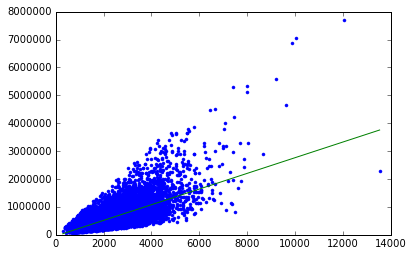

In [23]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data[['power_1']]),'-')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [31]:
poly2_data = polynomial_frame(sales['sqft_living'], 2)
my_features = poly2_data.columns.tolist() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target

In [32]:
model2 = LinearRegression()
model2 = model2.fit(poly2_data[my_features], poly2_data['price'])
print model2.coef_, model2.intercept_

[  6.79940947e+01   3.85812609e-02] 199222.279305


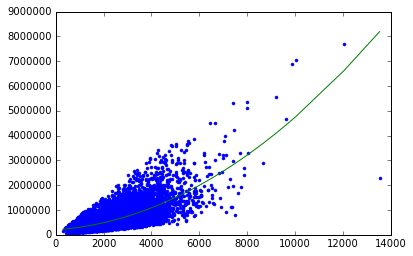

In [33]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data[my_features]),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [35]:
poly3_data = polynomial_frame(sales['sqft_living'], 3)
my_features = poly3_data.columns.tolist() # get the name of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target

In [36]:
model3 = LinearRegression()
model3 = model3.fit(poly3_data[my_features], poly3_data['price'])
print model3.coef_, model3.intercept_

[ -9.01819864e+01   8.70465089e-02  -3.84055260e-06] 336819.748221


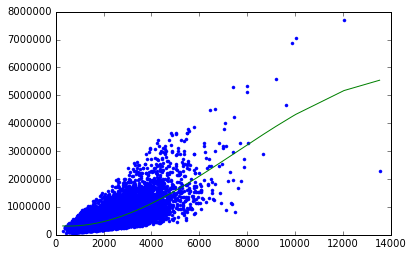

In [37]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data[my_features]),'-')

In [63]:
poly4_data = polynomial_frame(sales['sqft_living'], 4)
my_features = poly4_data.columns.tolist() # get the name of the features
poly4_data['price'] = sales['price'] # add price to the data since it's the target

In [64]:
model4 = LinearRegression()
model4 = model4.fit(poly4_data[my_features], poly4_data['price'])
print model4.coef_, model4.intercept_

[  1.14247512e+02  -4.57981144e-03   1.09013598e-05  -7.05040259e-10] 197702.356941


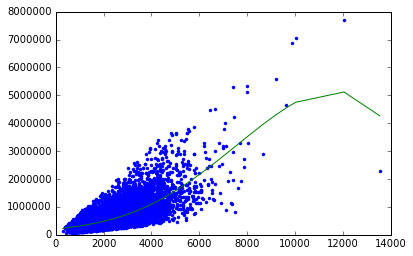

In [65]:
plt.plot(poly4_data['power_1'],poly4_data['price'],'.',
        poly4_data['power_1'], model4.predict(poly4_data[my_features]),'-')

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
subset1, subset2 = train_test_split(sales, train_size=0.5, random_state=0)
set_1, set_2 = train_test_split(subset1, train_size=0.5, random_state=0)
set_3, set_4 = train_test_split(subset2, train_size=0.5, random_state=0)

Fit a 4th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

[ -5.78272476e+01   6.64049664e-02   1.23611854e-06  -3.42543571e-10] 317725.509177


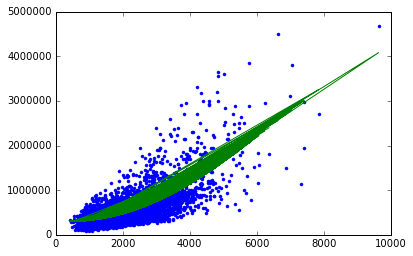

In [71]:
poly4_data1 = polynomial_frame(set_1['sqft_living'], 4)
my_features1 = poly4_data1.columns.tolist() # get the name of the features
poly4_data1['price'] = set_1['price'] # add price to the data since it's the target
model4_1 = LinearRegression()
model4_1 = model4_1.fit(poly4_data1[my_features1], poly4_data1['price'])
print model4_1.coef_, model4_1.intercept_
plt.plot(poly4_data1['power_1'],poly4_data1['price'],'.',
        poly4_data1['power_1'], model4_1.predict(poly4_data1[my_features1]),'-')

[ -3.45029865e+01   7.44233625e-02  -4.92402727e-06   2.47135694e-10] 288825.433344


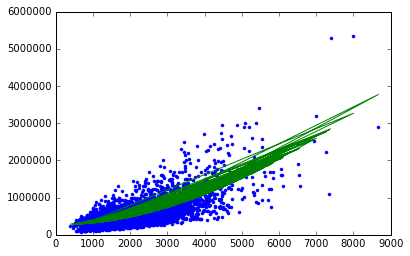

In [72]:
poly4_data2 = polynomial_frame(set_2['sqft_living'], 4)
my_features2 = poly4_data2.columns.tolist() # get the name of the features
poly4_data2['price'] = set_2['price'] # add price to the data since it's the target
model4_2 = LinearRegression()
model4_2 = model4_2.fit(poly4_data2[my_features2], poly4_data2['price'])
print model4_2.coef_, model4_2.intercept_
plt.plot(poly4_data2['power_1'],poly4_data2['price'],'.',
        poly4_data2['power_1'], model4_2.predict(poly4_data2[my_features2]),'-')

[  3.21994143e+02  -9.23955141e-02   2.44635145e-05  -1.32279433e-09] 48380.8377518


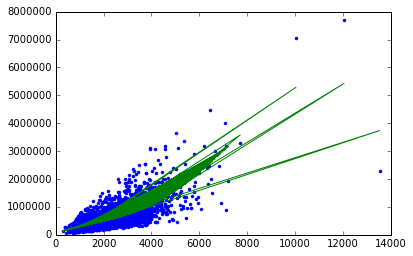

In [73]:
poly4_data3 = polynomial_frame(set_3['sqft_living'], 4)
my_features3 = poly4_data3.columns.tolist() # get the name of the features
poly4_data3['price'] = set_3['price'] # add price to the data since it's the target
model4_3 = LinearRegression()
model4_3 = model4_3.fit(poly4_data3[my_features3], poly4_data3['price'])
print model4_3.coef_, model4_3.intercept_
plt.plot(poly4_data3['power_1'],poly4_data3['price'],'.',
        poly4_data3['power_1'], model4_3.predict(poly4_data3[my_features3]),'-')

[ -3.00821008e+02   2.09501694e-01  -3.15741721e-05   1.99550602e-09] 455218.743252


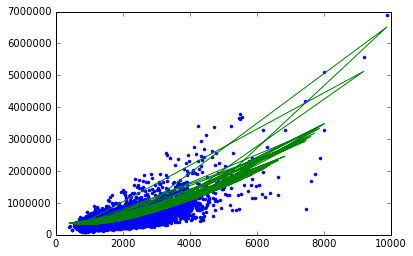

In [74]:
poly4_data4 = polynomial_frame(set_4['sqft_living'], 4)
my_features4 = poly4_data4.columns.tolist() # get the name of the features
poly4_data4['price'] = set_4['price'] # add price to the data since it's the target
model4_4 = LinearRegression()
model4_4 = model4_4.fit(poly4_data4[my_features4], poly4_data4['price'])
print model4_4.coef_, model4_4.intercept_
plt.plot(poly4_data4['power_1'],poly4_data4['price'],'.',
        poly4_data4['power_1'], model4_4.predict(poly4_data4[my_features4]),'-')

# Selecting a Polynomial Degree

In [75]:
training_and_validation, test_set = train_test_split(sales, train_size=0.9, random_state=1)
training_set, validation_set = train_test_split(training_and_validation, train_size=0.5, random_state=1)

In [77]:
degree = 0
min_rss = float('inf')
for power in range(1, 4 + 1):
    poly_data = polynomial_frame(training_set['sqft_living'], power)
    vali_data = polynomial_frame(validation_set['sqft_living'], power)
    test_data = polynomial_frame(test_set['sqft_living'], power)
    features = poly_data.columns.tolist()
    poly_data['price'] = training_set['price']
    #print poly_data
    modelx = LinearRegression()
    modelx = modelx.fit(poly_data[features], poly_data['price'])
    #print modelx.get('coefficients')
    residuals = validation_set['price'] - modelx.predict(vali_data[features])
    residuals_test = test_set['price'] - modelx.predict(test_data[features])
    vali_rss = sum(residuals * residuals)
    rss_test = sum(residuals_test * residuals_test)
    if vali_rss < min_rss:
        degree = power
        min_rss = vali_rss
    print "power" + str(power) + ": validation_rss=" + str(vali_rss) + " test_rss=" + str(rss_test)
degree

power1: validation_rss=6.88774305234e+14 test_rss=1.54228336671e+14
power2: validation_rss=6.23408727198e+14 test_rss=1.41501417113e+14
power3: validation_rss=6.26184335265e+14 test_rss=1.38149913788e+14
power4: validation_rss=6.19269329576e+14 test_rss=1.39702069479e+14


4